# What is the frequency of a finite-duration sine wave?
Consider the function 
$$
    f(t) = \begin{cases}
        \sin\left(\omega_0 t\right), & \left| t \right| \le {\large\frac{n\pi}{\omega_0}};\\
        0, & \left| t \right| > {\large \frac{n\pi}{\omega_0} }.
    \end{cases}
$$
What is the frequency? It seems like a silly question.
- We can simply read off $\omega = \omega_0$ from the definition of $f(t)$. 
- Measure the period $T$ between any two peaks (or any two descending nodes, or....). 
  Then $\omega = 2\pi/T$. This would yield the same result.
- We might anticipate two frequencies, $\omega = \pm \omega_0$, based on Euler's formula: 
    $$\sin{\omega_0 t} = \frac{-i}{2}\left( e^{i\omega_0 t} + e^{-i\omega_0 t} \right), $$

The Fourier Transform gives a more complicated answer, showing finite amplitudes at (nearly) all frequencies. In the lecture, I derived
$$
\mathcal{F}\left[ f(t) \right]
= \frac{-i}{\sqrt{2\pi}}\left\{
    \frac{ \sin \left[ \frac{n\pi}{\omega_0} \left(\omega-\omega_0\right) \right] }{ \omega-\omega_0 }  - 
    \frac{ \sin \left[ \frac{n\pi}{\omega_0} \left(\omega+\omega_0\right) \right] }{ \omega+\omega_0 }
\right\}
$$

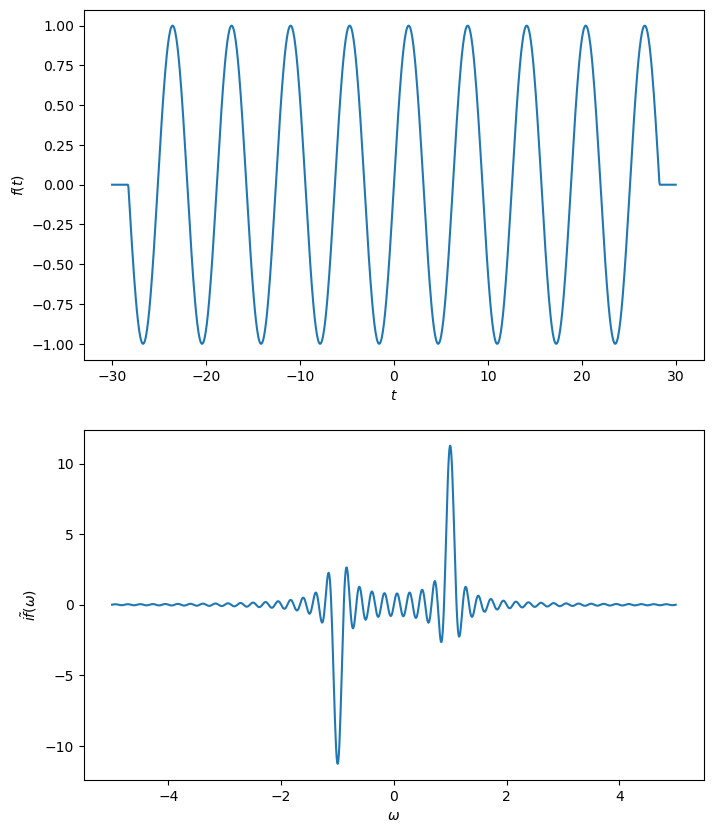

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# I'll use omega_0 = 1 throughout.
n = 9
t = np.linspace(-30,30,1000)
omega = np.linspace(-5,5,1000)
f = np.where(np.abs(t) <= n*np.pi, np.sin(t), 0)
F = (1/np.sqrt(2*np.pi))*( np.sin(n*np.pi*(omega-1))/(omega-1) - np.sin(n*np.pi*(omega+1))/(omega+1) )

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].plot(t,f)
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$f(t)$')
ax[1].plot(omega,F)
ax[1].set_xlabel(r'$\omega$')
ax[1].set_ylabel(r'$i\tilde{f}(\omega)$')
plt.show();

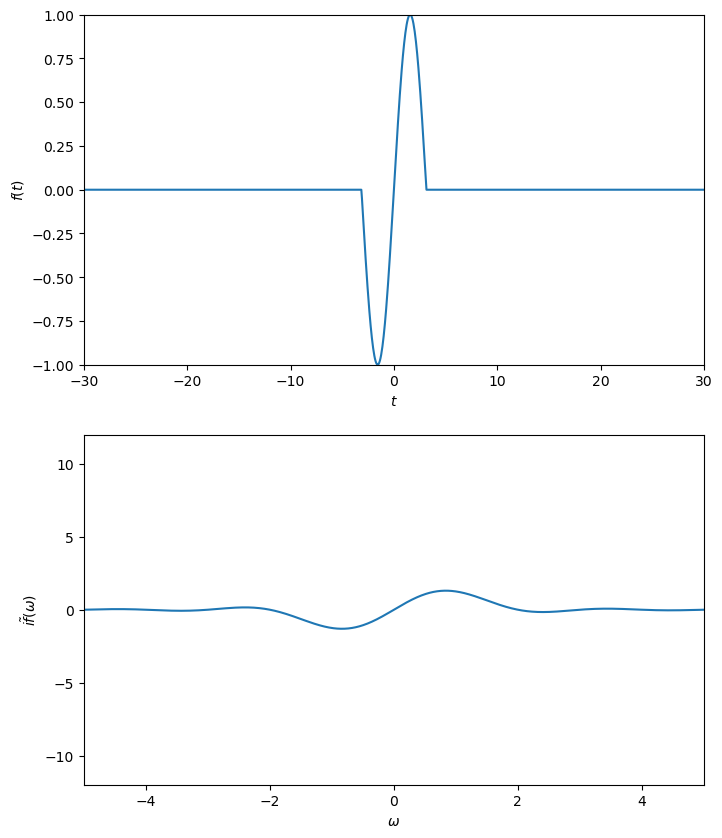

In [2]:
# Animated version.

from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r'$f(t)$')
ax[0].set_xlim((-30,30))
ax[0].set_ylim((-1,1))
ax[1].set_xlabel(r'$\omega$')
ax[1].set_ylabel(r'$i\tilde{f}(\omega)$')
ax[1].set_xlim((-5,5))
ax[1].set_ylim((-12,12))
time_domain, = ax[0].plot([], [])
frequency_domain, = ax[1].plot([], [])

def init():
    time_domain.set_data([], [])
    frequency_domain.set_data([], [])
    return time_domain, frequency_domain,

def animate(i):
    n=np.where(i<9, i+1, 17-i)
    t = np.linspace(-30,30,1000)
    omega = np.linspace(-5,5,1000)
    f = np.where(np.abs(t) <= n*np.pi, np.sin(t), 0)
    F = (1/np.sqrt(2*np.pi))*( np.sin(n*np.pi*(omega-1))/(omega-1) - 
                              np.sin(n*np.pi*(omega+1))/(omega+1) )
    time_domain.set_data(t,f)
    frequency_domain.set_data(omega,F)
    return time_domain, frequency_domain,

anim = FuncAnimation(fig, animate, init_func=init, frames=17, interval=500, blit=True)

anim.save('FTexample1.mov', writer='ffmpeg', fps=4)

